1. Download the “recipes.json” dataset from UGVLE and preprocessing the data.
2. Create a word cloud by using TF-IDF values of each ingredient in the recipes in the given dataset. 

In [93]:


# importing the packages 
import matplotlib.pyplot as plt
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk import download
nltk.download('averaged_perceptron_tagger')
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
import json
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
from nltk.tokenize import word_tokenize


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\BhagyaWijeratne\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [94]:
# Loading the json files 
data = pd.read_json('recipes.json', lines = True)
data.head(5)


,Name,url,Description,Author,Ingredients,Method
0,Christmas cupcakes,https://www.bbcgoodfood.com/recipes/72622/chri...,These beautiful and classy little cakes make l...,Sara Buenfeld,"[200g dark muscovado sugar, 175g butter, chopp...","[Tip the sugar, butter, dried fruit, whole che..."
1,Christmas buns,https://www.bbcgoodfood.com/recipes/1803633/ch...,Paul Hollywood's fruit rolls can be made ahead...,Paul Hollywood,"[500g strong white flour, plus extra for dusti...",[Put the flour and 1 tsp salt into a large bow...
2,Christmas cupcakes,https://www.bbcgoodfood.com/recipes/981634/chr...,"Made these for the second time today, and I ha...",Barney Desmazery,"[280g self-raising flour, 175g golden caster s...",[Heat oven to 190C/170 fan/gas 5 and line a 12...
3,Christmas slaw,https://www.bbcgoodfood.com/recipes/890635/chr...,"A nutty winter salad which is superhealthy, qu...",Good Food,"[2 carrots, halved, ½ white cabbage, shredded,...",[Peel strips from the carrots using a vegetabl...
4,Christmas mess,https://www.bbcgoodfood.com/recipes/2806664/ch...,Delicious and a synch to make! Have made this ...,Caroline Hire,"[600ml double cream, 400g Greek yoghurt, 4 tbs...",[In a small saucepan gently heat the frozen be...


In [95]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1615 entries, 0 to 1614
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         1615 non-null   object
 1   url          1615 non-null   object
 2   Description  1427 non-null   object
 3   Author       1609 non-null   object
 4   Ingredients  1615 non-null   object
 5   Method       1615 non-null   object
dtypes: object(6)
memory usage: 75.8+ KB


In [96]:
data['Ingredients'].head(5)

0    [200g dark muscovado sugar, 175g butter, chopp...
1    [500g strong white flour, plus extra for dusti...
2    [280g self-raising flour, 175g golden caster s...
3    [2 carrots, halved, ½ white cabbage, shredded,...
4    l double cream, 400g Greek yoghurt, 4 tbs...
Name: Ingredients, dtype: object

In [97]:
#cleaning the dataset
data['Ingredients'] = data['Ingredients'].map(lambda x: re.sub(r'[^a-zA-Z ] ', ' ', str(x)))


In [98]:
data = data.dropna(subset=['Ingredients'])

In [99]:
# find stop words, along with recipe realted stopwords
stop = stopwords.words('english') + ['tsp', 'tbsp', 'finely','extra', 'chopped','optional','food','large','piece', 'piece whole','plus','ground']
stop

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [100]:

def remove_encoding_word(word):
    # Convert the input to a string (in case it is not already a string)
    word = str(word)
    # Encode the string to ASCII, ignoring any characters that can't be encoded, 
    # then decode it back to ASCII, effectively removing any non-ASCII characters
    word = word.encode('ASCII', 'ignore').decode('ASCII')
    return word # Return the cleaned word


def remove_encoding_text(text):
    # Convert the input to a string (in case it is not already a string)
    text = str(text)
    # Split the text into individual words, apply remove_encoding_word to each word,
    # and join the cleaned words back into a single string, ensuring no stop words are included
    text = ' '.join(remove_encoding_word(word) for word in text.split() if word not in stop)
    return text  # Return the cleaned text


# Function to remove verbs using POS tagging
def remove_verbs(text):
    words = word_tokenize(text)
    tagged = pos_tag(words)
    # Keep only non-verb words
    non_verbs = [word for word, tag in tagged if not tag.startswith('VB')]
    return ' '.join(non_verbs)



In [101]:
#lemmatize the text
data['Ingredients'] = data['Ingredients'].apply(remove_encoding_text)

# Apply the remove_verbs function first
data['Ingredients'] = data['Ingredients'].apply(remove_verbs)

In [102]:
text = ' '.join(words for words in data['Ingredients'])
len(text)

353550

In [103]:
# initialize the lemmatizer
lemmatizer = WordNetLemmatizer()

# define the lemma function to use lemmatizer's lemmatize method
lemma = lemmatizer.lemmatize

# original word
original_word = 'leaves'

# Lemmatize the original word
lemmatized_word = lemma(original_word)

# Print the lemmatized word
print(lemmatized_word)  # Output: 'leaf'

leaf


In [104]:
#fit into the tf-idf model
def tokenize(document):
    tokens = [lemma(w) for w in document.split() if len(w) > 3 and w.isalpha()]
    return tokens

In [105]:
# Initialize the TF-IDF vectorizer with specific parameters
vectorizer = TfidfVectorizer(tokenizer = tokenize, ngram_range = ((2,2)), stop_words = stop, strip_accents = 'unicode')


In [106]:
# Fit the vectorizer to the 'Ingredients' column of the data and transform it into a term-document matrix (TDM)

tdm = vectorizer.fit_transform(data['Ingredients'])


C:\Program Files\anaconda\lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
C:\Program Files\anaconda\lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['doe', 'whole'] not in stop_words.
  warnings.warn(


In [107]:
# Access the vocabulary learned by the vectorizer
vocabulary_items = vectorizer.vocabulary_.items()

# print the vocabulary items to inspect them
print(vocabulary_items)

dict_items([('dark muscovado', 3718), ('muscovado sugar', 7584), ('sugar butter', 12185), ('butter luxury', 1465), ('luxury dried', 6858), ('dried fruit', 3950), ('fruit glac', 4867), ('glac cherry', 5158), ('cherry fresh', 2083), ('fresh root', 4752), ('root ginger', 10133), ('ginger juice', 5090), ('juice orange', 5956), ('orange dark', 8226), ('dark brandy', 3699), ('brandy orange', 1025), ('orange juice', 8253), ('juice pecannuts', 5961), ('pecannuts roughly', 8922), ('roughly egg', 10243), ('egg almond', 4062), ('almond flour', 74), ('flour powder', 4545), ('powder mixed', 9571), ('mixed spice', 7511), ('spice cinnamon', 11561), ('cinnamon pack', 2671), ('pack marzipan', 8423), ('marzipan oetker', 7057), ('oetker warm', 7893), ('warm apricotjam', 13647), ('apricotjam shredless', 331), ('shredless marmalade', 11065), ('marmalade pack', 7002), ('pack fondant', 8408), ('fondant icingsugar', 4608), ('icingsugar sugar', 5802), ('sugar gold', 12265), ('gold silver', 5227), ('silver muff

In [108]:
# creating the wordcloud. 
tfidf_weights = [(word, tdm.getcol(idx).sum()) for word, idx in vectorizer.vocabulary_.items()]


In [109]:
tfidf_weights[0:10]


[('dark muscovado', 6.203615631956343),
 ('muscovado sugar', 17.085624209618345),
 ('sugar butter', 6.15860065363576),
 ('butter luxury', 0.5192863872426927),
 ('luxury dried', 0.5192863872426927),
 ('dried fruit', 1.7102948604223298),
 ('fruit glac', 0.9858714123499427),
 ('glac cherry', 5.21292945285752),
 ('cherry fresh', 0.5192863872426927),
 ('fresh root', 2.8800738420855536)]

In [110]:
fig_w = WordCloud(width=1500, height=1200, mode='RGBA', background_color='white', max_words=2000).fit_words(dict(tfidf_weights))


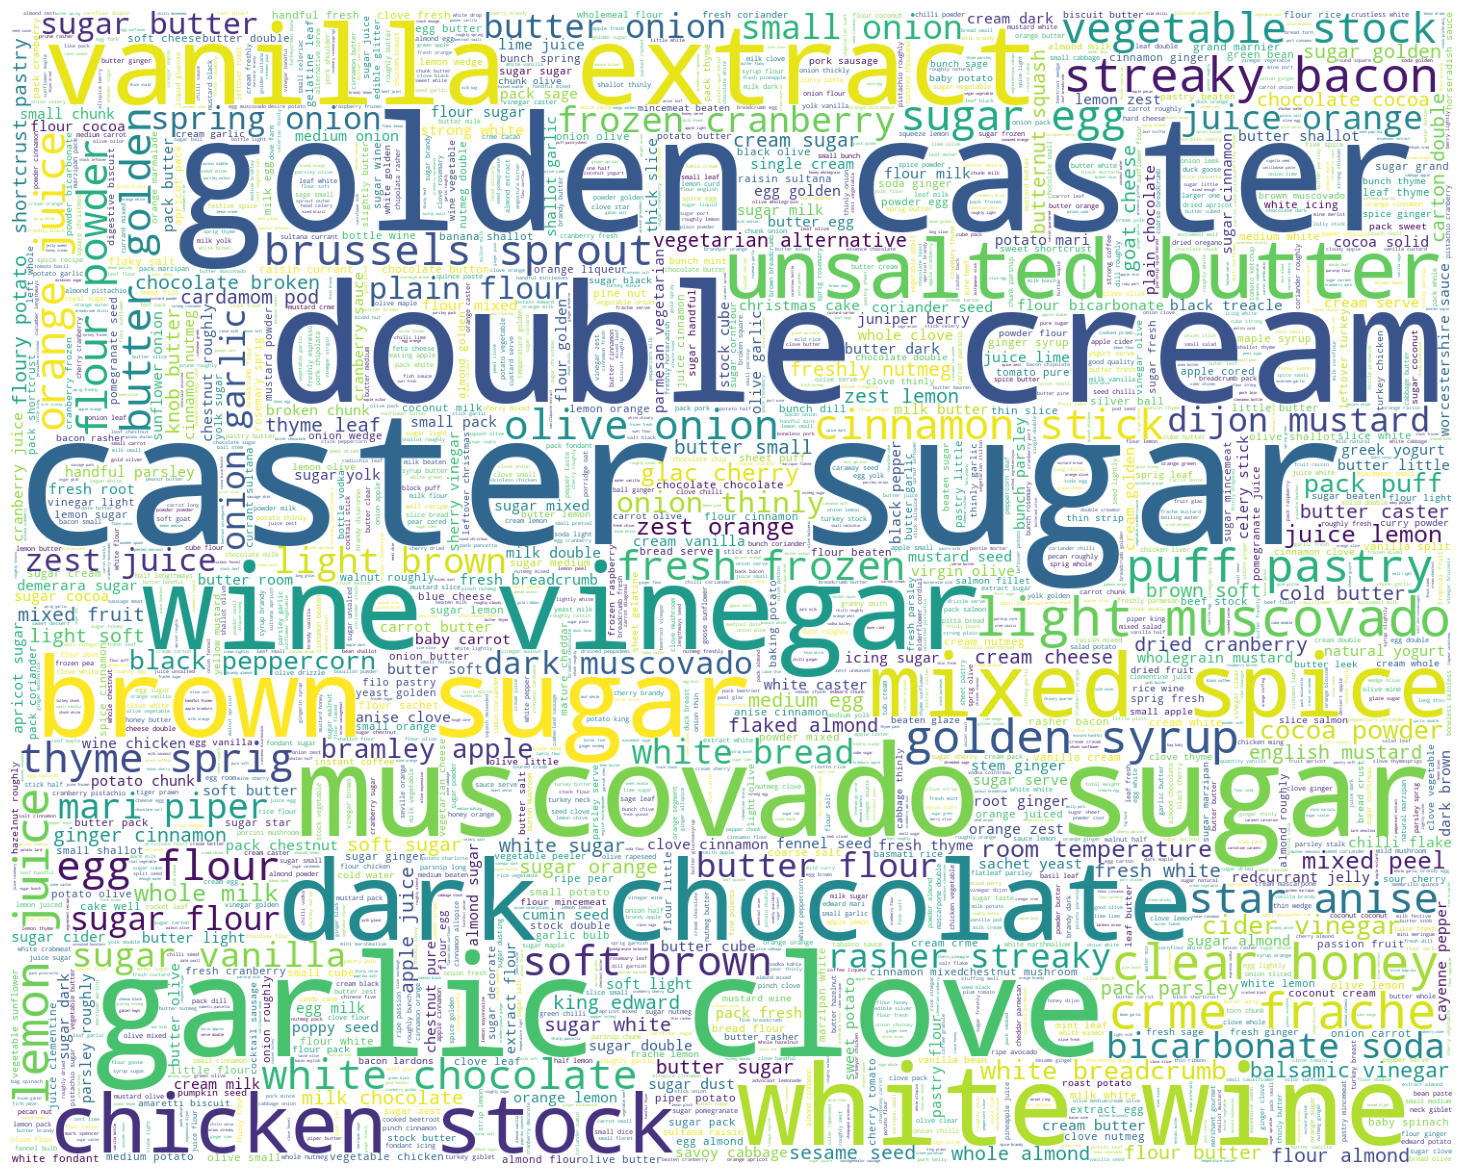

In [111]:
plt.figure(figsize=(20,15))
plt.imshow(fig_w)
plt.axis('off')
plt.savefig('recipes_wordcloud.png')